# TICL Pattern Recognition

This notebook builds a labeled dataset for identifying complete and incomplete tracksters.

In [1]:
import uproot

Load the datasets

In [2]:
# double gamma (two photons)
file_name = "data/ntuples_13801550_969.root"

tracksters_ds    = {file_name: "ticlNtuplizer/tracksters"}
simtracksters_ds = {file_name: "ticlNtuplizer/simtrackstersSC"}
associations_ds  = {file_name: "ticlNtuplizer/associations"}

In [3]:
tracksters = uproot.open(tracksters_ds)
simtracksters = uproot.open(simtracksters_ds)
associations = uproot.open(associations_ds)

Print the available attributes

In [4]:
tracksters.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
event                                    | uint32_t                 | AsDtype('>u4')
NClusters                                | uint32_t                 | AsDtype('>u4')
NTracksters                              | uint32_t                 | AsDtype('>u4')
time                                     | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
timeError                                | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
regressed_energy                         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_energy                               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_em_energy                            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_pt                                

In [5]:
simtracksters.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
stsSC_event                              | uint32_t                 | AsDtype('>u4')
stsSC_NClusters                          | uint32_t                 | AsDtype('>u4')
stsSC_NTracksters                        | uint32_t                 | AsDtype('>u4')
stsSC_time                               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_timeError                          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_regressed_energy                   | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_energy                         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_em_energy                      | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_pt                          

In [6]:
associations.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
tsCLUE3D_recoToSim_SC                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_SC_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_SC                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_SC_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_SC_sharedE            | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_CP                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_CP_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_CP                    | std::vector<std::vect... | AsObjects(AsVector(Tr

In [7]:
# print some stats
print("Events:", tracksters["event"].array())
print("Rec Tracksters:", tracksters["NTracksters"].array())
print("Sim Tracksters:", simtracksters["stsSC_NTracksters"].array())

Events: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ... 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Rec Tracksters: [2, 3, 2, 3, 5, 2, 3, 3, 5, 2, 3, 3, 4, 2, ... 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2]
Sim Tracksters: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Plot the tracksters
- there is 100 events in the dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_bounding_box(eid):
    # get the trackster barycenters for event eid
    bx = tracksters["barycenter_x"].array()[eid]
    by = tracksters["barycenter_y"].array()[eid]
    bz = tracksters["barycenter_z"].array()[eid]
    sbx = simtracksters["stsSC_barycenter_x"].array()[eid]
    sby = simtracksters["stsSC_barycenter_y"].array()[eid]
    sbz = simtracksters["stsSC_barycenter_z"].array()[eid]

    # get approximate plottable area
    x_max = max([max(bx), max(sbx)]) + 10
    x_min = min([min(bx), min(sbx)]) - 10
    y_max = max([max(by), max(sby)]) + 10
    y_min = min([min(by), min(sby)]) - 10
    z_max = max([max(bz), max(sbz)]) + 10
    z_min = min([min(bz), min(sbz)]) - 10

    return x_max, x_min, y_max, y_min, z_max, z_min

def plot_event(eid):
    """
    Plot Reco and Sim tracksters in the event
    """
    x_max, x_min, y_max, y_min, z_max, z_min = get_bounding_box(eid)

    # get the layerclusters for event eid
    vx = tracksters["vertices_x"].array()[eid]
    vy = tracksters["vertices_y"].array()[eid]
    vz = tracksters["vertices_z"].array()[eid]
    svx = simtracksters["stsSC_vertices_x"].array()[eid]
    svy = simtracksters["stsSC_vertices_y"].array()[eid]
    svz = simtracksters["stsSC_vertices_z"].array()[eid]

    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    for i, x, y, z in zip(range(len(vx)), vx, vy, vz):
        ax.scatter(x, y, z, label=i)
    ax.set_title(f"Event {eid}: Layerclusters reco")
    ax.legend()

    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    for i, x, y, z in zip(range(len(svx)), svx, svy, svz):
        ax.scatter(x, y, z, label=i)
    ax.set_title(f"Event {eid}: Layerclusters sim")
    ax.legend()


SimTracksters: 2
RecoTracksters: 3


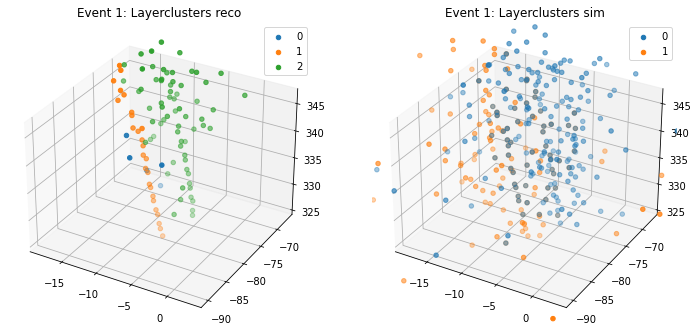

In [10]:
eid = 1
plot_event(eid)
print("SimTracksters:", simtracksters["stsSC_NTracksters"].array()[eid])
print("RecoTracksters:", tracksters["NTracksters"].array()[eid])

### Association scores
- 1 means completely unmatched
- 0 means a perfect 

The idea is to use argmax over the scores and then get the index of the best matched trackster

In [11]:
r2si = associations["tsCLUE3D_recoToSim_SC"].array()[eid]
r2s = associations["tsCLUE3D_recoToSim_SC_score"].array()[eid] # [tracksters] -> [simtracksters]

s2ri = associations["tsCLUE3D_simToReco_SC"].array()[eid]
s2r = associations["tsCLUE3D_simToReco_SC_score"].array()[eid] # [simtracksters] -> [tracksters]

print("Reco to sim:", r2s)
print("Reco to sim indexes:", r2si)

print("Sim to reco:", s2r)
print("Sim to reco indexes:", s2ri)

Reco to sim: [[0.594, 0.124], [0.983, 0.000295], [0.985, 0.000688]]
Reco to sim indexes: [[1, 0], [0, 1], [1, 0]]
Sim to reco: [[0.00518, 1, 1], [0.00868, 0.998, 1]]
Sim to reco indexes: [[2, 0, 1], [1, 2, 0]]


### Training set categories:
- **perfect match**
    - same number of sim and reco tracksters
    - only one matched trackster below a threshold
- **mix-up** (skip for now)
    - same number of sim and reco tracksters
    - multiple matched tracksters below a threshold
    - should be split and reclustered?
- **overmerged** (skip for now)
    - more sim tracksters than reco tracksters
    - should be split
- **split**
    - more reco tracksters than sim tracksters
    - multiple well matched tracksters
    - should be joined

In [12]:
perfect_eids = []
split_eids = []
match_threshold = 0.2

for eid in range(len(tracksters["event"].array())):
    
    # get the number of tracksters
    num_rec_t = tracksters["NTracksters"].array()[eid]
    num_sim_t = simtracksters["stsSC_NTracksters"].array()[eid]

    # get reco <-> sim maps
    r2s = np.array(associations["tsCLUE3D_recoToSim_SC_score"].array()[eid])
    s2r = np.array(associations["tsCLUE3D_simToReco_SC_score"].array()[eid])

    if num_rec_t == num_sim_t:  # matching number of tracksters
        perf_match = True  # assume perfect match

        for ti, reco_t in enumerate(r2s):
            sim_mask = (reco_t < match_threshold).astype(int)
            if np.sum(sim_mask) != 1:
                perf_match = False
                print(f"Event {eid}/{ti} reco to sim mismatch: {reco_t}")

        for ti, sim_t in enumerate(s2r):
            reco_mask = (sim_t < match_threshold).astype(int)
            if np.sum(reco_mask) != 1:
                perf_match = False
                print(f"Event {eid}/{ti} sim to reco mismatch: {sim_t}")
                
        if perf_match:
            perfect_eids.append(eid)

    elif num_rec_t > num_sim_t: # split
        split_eids.append(eid)
    else:                       # overmerged
        print(f"Event {eid} is overmerged ({num_sim_t} in {num_rec_t})")

Event 17 is overmerged (2 in 1)
Event 19/0 sim to reco mismatch: [0.73791397 0.9987886 ]
Event 19/1 sim to reco mismatch: [1.         0.99885392]
Event 21/0 sim to reco mismatch: [0.37724075 1.        ]
Event 22 is overmerged (2 in 1)
Event 40/0 reco to sim mismatch: [0.29347098 0.22524989]
Event 40/1 reco to sim mismatch: [0.32130352 0.30725446]
Event 40/0 sim to reco mismatch: [0.99007386 0.99984878]
Event 40/1 sim to reco mismatch: [0.99869096 0.99963379]
Event 44 is overmerged (2 in 1)
Event 52 is overmerged (2 in 1)
Event 53 is overmerged (2 in 1)
Event 65/0 sim to reco mismatch: [0.9565888  0.99285579]
Event 65/1 sim to reco mismatch: [0.69474852 0.99969226]
Event 76 is overmerged (2 in 1)
Event 92 is overmerged (2 in 1)
Event 96/0 sim to reco mismatch: [0.73376805 0.99990916]
Event 96/1 sim to reco mismatch: [0.95187962 0.99977297]
Event 98 is overmerged (2 in 1)


Perfect events: [0, 2, 5, 9, 13, 14, 20, 24, 26, 27, 28, 29, 32, 33, 35, 37, 41, 43, 45, 47, 48, 50, 51, 54, 60, 64, 66, 69, 70, 73, 74, 77, 78, 80, 82, 83, 84, 87, 88, 89, 91, 93, 94, 95, 97, 99]
Split events: [1, 3, 4, 6, 7, 8, 10, 11, 12, 15, 16, 18, 23, 25, 30, 31, 34, 36, 38, 39, 42, 46, 49, 55, 56, 57, 58, 59, 61, 62, 63, 67, 68, 71, 72, 75, 79, 81, 85, 86, 90]


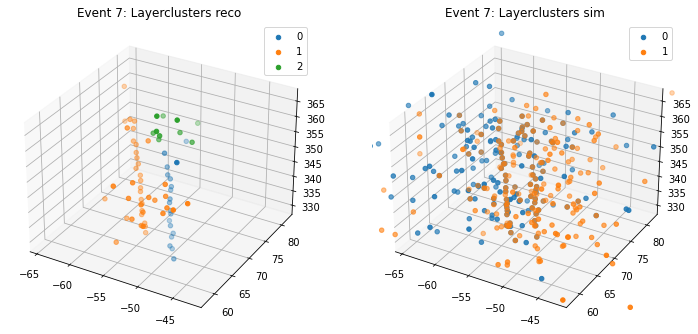

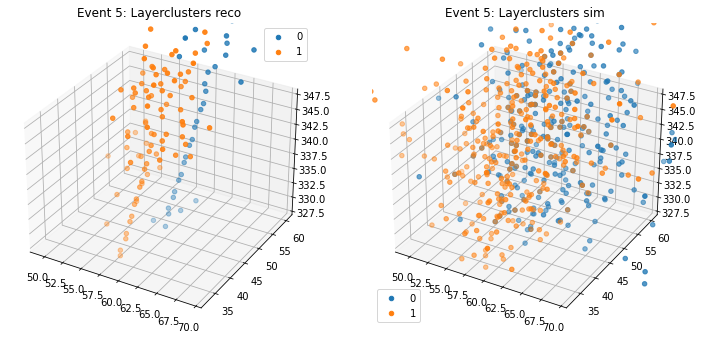

In [13]:
print("Perfect events:", perfect_eids)
print("Split events:", split_eids)

plot_event(7)
plot_event(5)

### Incomplete trackster identification

Not all tracksters in a split event are incomplete.
- Try to identify the most mismatched tracksters
- We even know how many they should be

Incomplete trackster candidates
- use fractions simToReco shared energy (fraction shared to total)
- tracksters with the smallest fraction are probably the ones we need to merge in
- TODO: get histograms of these fractions (to test the separation)

In [14]:
def incomplete_shared_energy():
    """
    Compute incomplete tracksters based on shared energy
    """
    incomplete_tracksters = []
    for split_eid in split_eids:
        # get the number of extra tracksters
        num_rec_t = tracksters["NTracksters"].array()[split_eid]
        num_sim_t = simtracksters["stsSC_NTracksters"].array()[split_eid]
        num_extra_t = num_rec_t - num_sim_t

        # get the raw energy of reco and sim tracksters
        # raw_energy = np.array(tracksters["raw_energy"].array()[split_eid])
        st_raw_energy = np.array(simtracksters["stsSC_raw_energy"].array()[split_eid])

        # get the shared energy mapping
        # sim to reco, not reco to sim (naming is wring, use simToReco indices)
        s2ri = np.array(associations["tsCLUE3D_simToReco_SC"].array()[split_eid])
        s2r_SE = np.array(associations["tsCLUE3D_recoToSim_SC_sharedE"].array()[split_eid])

        # keep the highest fraction
        reco_fr = [0] * num_rec_t

        # for each trackster, get the simtrackster with the highest energy fraction
        for st_i, reco_indexes, shared_energies in zip(range(len(s2ri)), s2ri, s2r_SE):
            st_e = st_raw_energy[st_i]
            # print(f"Event {split_eid} Sim trackster {st_i} with energy {st_e:.4f}:")
            for rt_i, sh_e in zip(reco_indexes, shared_energies):
                fraction = sh_e / st_e
                # rt_e = raw_energy[rt_i]
                # print(f"\tshared energy with {rt_i} ({rt_e:.4f}): {sh_e:.4f} / {st_e:.4f} = {fraction:.4f}")
                if fraction > reco_fr[rt_i]:
                    reco_fr[rt_i] = fraction

        sorted_fr = sorted(range(len(reco_fr)), key=lambda x: reco_fr[x])
        extra_t = sorted_fr[:num_extra_t]

        incomplete_tracksters.append((split_eid, extra_t))
    return incomplete_tracksters

In [15]:
incomplete_tracksters = incomplete_shared_energy()

### Inspect the results

Event 1: incomplete tracksters [0]
Event 3: incomplete tracksters [2]


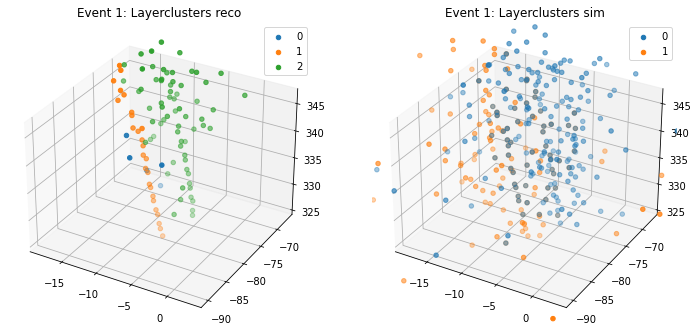

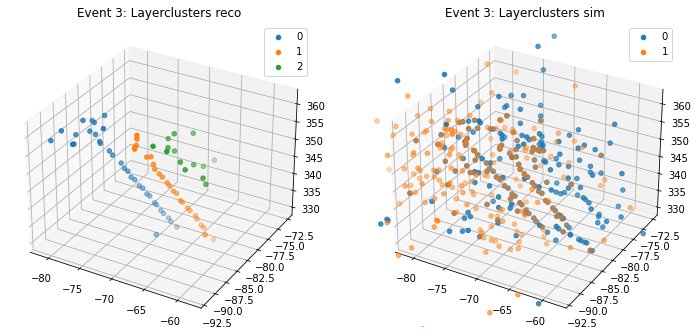

In [16]:
for eid, it in incomplete_tracksters[:2]:
    print(f"Event {eid}: incomplete tracksters {it}")
    plot_event(eid)

In [17]:
incomplete_x = []
incomplete_y = []
incomplete_z = []
incomplete_e = []

for eid, tids in incomplete_tracksters:
    # get all the tracksters in the event
    vx = tracksters["vertices_x"].array()[eid]
    vy = tracksters["vertices_y"].array()[eid]
    vz = tracksters["vertices_z"].array()[eid]
    ve = tracksters["vertices_energy"].array()[eid]

    # get layercluster coordinates and energy of the trackster
    for tid in tids:
        incomplete_x.append(vx[tid])
        incomplete_y.append(vy[tid])
        incomplete_z.append(vz[tid])
        incomplete_e.append(ve[tid])

In [18]:
complete_x = []
complete_y = []
complete_z = []
complete_e = []

for eid in perfect_eids:
    # get all the tracksters in the event
    vx = tracksters["vertices_x"].array()[eid]
    vy = tracksters["vertices_y"].array()[eid]
    vz = tracksters["vertices_z"].array()[eid]
    ve = tracksters["vertices_energy"].array()[eid]

    # flatten the tracksters
    for tvx, tvy, tvz, tve in zip(vx, vy, vz, ve):
        complete_x.append(tvx)
        complete_y.append(tvy)
        complete_z.append(tvz)
        complete_e.append(tve)

In [19]:
ds = uproot.recreate("./tracksters_ds.root")
ds["tracksters/incomplete"] = {
    "vertices_x": incomplete_x,
    "vertices_y": incomplete_y,
    "vertices_z": incomplete_z,
    "vertices_e": incomplete_e
}
ds["tracksters/complete"] = {
    "vertices_x": complete_x,
    "vertices_y": complete_y,
    "vertices_z": complete_z,
    "vertices_e": complete_e
}
ds.close()

In [20]:
ds = uproot.open("./tracksters_ds.root")
print(ds.classnames())
print(ds.values())
print(ds["tracksters/incomplete"].show())
print(ds["tracksters/complete"].show())
ds.close()

{'tracksters;1': 'TDirectory', 'tracksters/incomplete;1': 'TTree', 'tracksters/complete;1': 'TTree'}
[<ReadOnlyDirectory '/tracksters' at 0x000141357130>, <TTree 'incomplete' (8 branches) at 0x0001413fb1c0>, <TTree 'complete' (8 branches) at 0x00014138bc10>]
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nvertices_x          | int32_t                  | AsDtype('>i4')
vertices_x           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_y          | int32_t                  | AsDtype('>i4')
vertices_y           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_z          | int32_t                  | AsDtype('>i4')
vertices_z           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_e          | int32_t                  | AsDtype('>i4')
vertices_e           | double[]                 | AsJagged(AsDtype('>f8'))
None
name          